In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy.signal import find_peaks
import seaborn as sns

### Part 1 - Data import

First, the data of monthly and yearly aviation figures will be imported. As we will only examine passenger figures, cargo figures are removed from the dataframes.

In [80]:
flight_data = pd.read_csv('Monthly_figures_on_aviation_11102023_111803.csv', delimiter = ';')
flight_data_year = pd.read_csv('Monthly_figures_on_aviation_11102023_103331.csv', delimiter = ';')

#Dropping irrelevant columns
flight_data.drop(columns=['Commercial air traffic/Cargo/Total cargo/Total cargo (ton)', 'Commercial air traffic/Mail/Total mail/Total mail (ton)'], inplace=True)
flight_data_year.drop(columns=['Commercial air traffic/Cargo/Total cargo/Total cargo (ton)', 'Commercial air traffic/Mail/Total mail/Total mail (ton)'], inplace=True)

flight_data['Periods'] = pd.to_datetime(flight_data['Periods'], format='%Y %B', errors='coerce')
flight_data_year['Periods'] = pd.to_datetime(flight_data_year['Periods'], format='%Y', errors='coerce')

flight_data.head()

,Airports,Periods,Aircraft movements/Cross-country flights (number),Aircraft movements/Local flights (number),Commercial air traffic/Flights/All flights/Total flights (number),Commercial air traffic/Flights/All flights/Scheduled (number),Commercial air traffic/Passengers/Total passengers/Total passengers (number)
0,Total Dutch airports,1999-01-01,36810,14868,33145,31222.0,2439980
1,Total Dutch airports,1999-02-01,34356,11314,30912,29015.0,2405830
2,Total Dutch airports,1999-03-01,41290,18152,35591,33278.0,2905023
3,Total Dutch airports,1999-04-01,41338,18043,35832,33114.0,2983754
4,Total Dutch airports,1999-05-01,44679,18932,38376,34138.0,3399339


In [81]:
#Data preperation dataframe 1 about the wealth
data = 'naamloze map/Wealth_households__components_of_wealth_19102023_113649.csv'
wealth = pd.read_csv(data, delimiter = ';')
wealth.iloc[15,2] = '2021'
wealth['Mean wealth (1 000 euros)'] = wealth['Mean wealth (1 000 euros)'].str.replace(',', '.').astype(float)
display(wealth)

,Household characteristics,Components of wealth,Periods,Number of private households (x 1 000),Total wealth (bn euros),Mean wealth (1 000 euros),Median wealth (1 000 euros)
0,Private households,Wealth,2006,"7024,5","1146,4",163.2,"33,1"
1,Private households,Wealth,2007,"7081,5","1222,9",172.7,"40,3"
2,Private households,Wealth,2008,7146,"1309,3",183.2,"44,6"
3,Private households,Wealth,2009,"7214,8","1274,9",176.7,"40,1"
4,Private households,Wealth,2010,"7281,3",1253,172.1,"32,7"
5,Private households,Wealth,2011,"7347,6","1240,3",168.8,"31,8"
6,Private households,Wealth,2012,"7412,1","1174,6",158.5,"25,1"
7,Private households,Wealth,2013,"7467,8",1123,150.4,"17,2"
8,Private households,Wealth,2014,"7496,4","1131,2",150.9,"17,3"
9,Private households,Wealth,2015,"7568,5","1214,3",160.4,"20,9"


In [82]:
#Data preperation dataframe 2 about the flights
df = 'naamloze map/Monthly_figures_on_aviation_19102023_113618.csv'
flight = pd.read_csv(df, delimiter =';')
flight.rename(columns={'Commercial air traffic/Flights/All flights/Total flights (number)': 'Total flights'}, inplace=True)
flight.rename(columns={'Commercial air traffic/Passengers/Total passengers/Total passengers (number)': 'Total passengers'}, inplace=True)
flight['Amsterdam Schiphol Airport flights'] = [423122, 435972, 428332, 391265, 386316, 420245, 423405, 425565, 438295, 450673, 478864, 496739, 499444, 496827, 227275, 266956]
flight['Eindhoven Airport flights'] = [11398, 12390, 14491, 13432, 16244, 19680, 22450, 24593, 27023, 28835, 30910, 34929, 37035, 40209, 17875, 20524]
flight['Rotterdam Airport flights'] = [18276, 18555, 17447, 15397, 14643, 14948, 15245, 18659, 18790, 19022, 19055, 16270, 17615, 18406, 6337, 8307]
display(flight)

,Airports,Periods,Total flights,Total passengers,Commercial air traffic/Cargo/Total cargo/Total cargo (ton),Commercial air traffic/Mail/Total mail/Total mail (ton),Amsterdam Schiphol Airport flights,Eindhoven Airport flights,Rotterdam Airport flights
0,Total Dutch airports,2006,467332,48596556,1581305,40321,423122,11398,18276
1,Total Dutch airports,2007,479506,50517673,1668673,41103,435972,12390,18555
2,Total Dutch airports,2008,473563,50425690,1623778,34873,428332,14491,17447
3,Total Dutch airports,2009,429129,46455743,1340756,30749,391265,13432,15397
4,Total Dutch airports,2010,427392,48591528,1574598,25878,386316,16244,14643
5,Total Dutch airports,2011,462330,53868142,1589253,25880,420245,19680,14948
6,Total Dutch airports,2012,468581,55653320,1536055,28375,423405,22450,15245
7,Total Dutch airports,2013,476792,58047513,1585170,34872,425565,24593,18659
8,Total Dutch airports,2014,491024,60932617,1689976,37481,438295,27023,18790
9,Total Dutch airports,2015,504967,64634615,1677452,34385,450673,28835,19022


### Part 2 - Data processing

In this part, the imported flight data will be analysed to identify the trends in the data. The the scipy feature to find peaks will be used to find peaks and valleys in the data over time. 

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



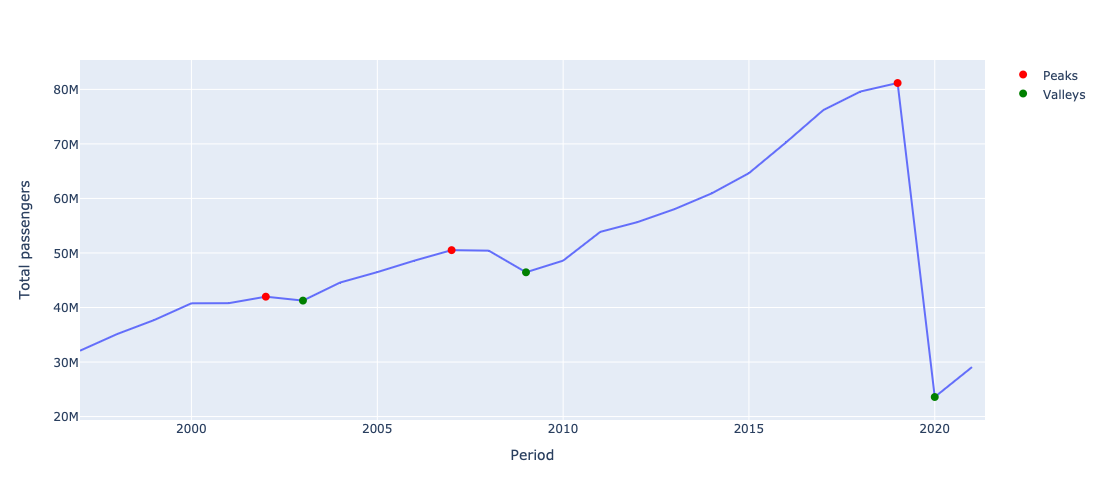

In [83]:
#creating a line chart
fig = px.line(flight_data_year[flight_data_year['Airports'] == 'Total Dutch airports'], x='Periods', y='Commercial air traffic/Passengers/Total passengers/Total passengers (number)')
fig.update_layout(height=500, xaxis_title='Period', yaxis_title='Total passengers')

# Finding peaks and valleys 
data = flight_data_year[flight_data_year['Airports'] == 'Total Dutch airports']['Commercial air traffic/Passengers/Total passengers/Total passengers (number)']
peaks = find_peaks(data, height=0)[0]
valleys = find_peaks(-data)[0]  

# Get corresponding x-values (periods) for peaks and valleys
periods = flight_data_year[flight_data_year['Airports'] == 'Total Dutch airports']['Periods']

# Add markers for peaks and valleys with correct x-values and labels
peak_labels = [f'Peak: {data.iloc[peak]} passengers, {periods.iloc[peak]}' for peak in peaks]
valley_labels = [f'Valley: {data.iloc[valley]} passengers, {periods.iloc[valley]}' for valley in valleys]

# Add markers for peaks and valleys with correct x-values
fig.add_trace(go.Scatter(x=periods.iloc[peaks], y=data.iloc[peaks],
                    mode='markers',
                    marker=dict(color='red', size=8),
                    name='Peaks'))
fig.add_trace(go.Scatter(x=periods.iloc[valleys], y=data.iloc[valleys],
                    mode='markers',
                    marker=dict(color='green', size=8),
                    name='Valleys'))

fig.show()

In the yearly data of total passengers flying from Dutch airports, one minor valley and two major valleys can be identified. The first valley is in 2003. This is only a minor decline compared to 2002, and takes only one year. Afgter 2007, the number of passenger sees a bigger an longer decrease whereafter the total count alomost doubles in ten years, between 2009 and 2019. The year of 2002 sees the biggest drop in passenger numbers, with only a fourth of the total passengers from 2019 left in 2020.  

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old beh

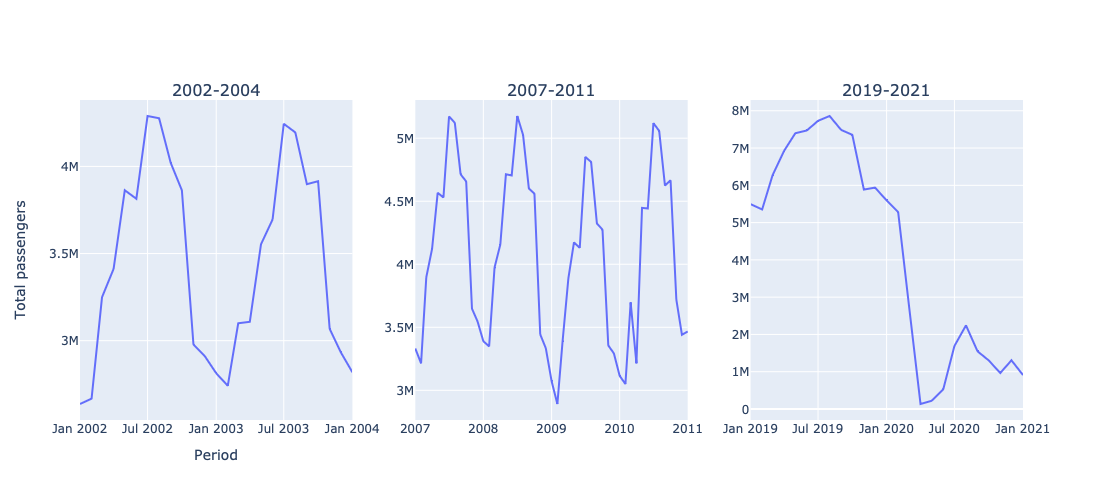

In [103]:
# Filter the data for the specified periods
periods = ['2002-2004', '2007-2011', '2019-2021']
start_dates = ['2002 January', '2007 January', '2019 January']
end_dates = ['2004 January', '2011 January', '2021 January']

filtered_data = [
    flight_data[
        (flight_data['Periods'] >= pd.to_datetime(start_date, format='%Y %B')) &
        (flight_data['Periods'] <= pd.to_datetime(end_date, format='%Y %B'))
    ]
    for start_date, end_date in zip(start_dates, end_dates)
]

# Create subplots
fig = make_subplots(rows=1, cols=len(periods), subplot_titles=periods)

# Plot the data for each period
for i, data in enumerate(filtered_data):
    fig.add_trace(px.line(data[data['Airports'] == 'Total Dutch airports'], x='Periods', y='Commercial air traffic/Passengers/Total passengers/Total passengers (number)').data[0], row=1, col=i + 1)

# Update layout
fig.update_layout(height=500, xaxis_title='Period', yaxis_title='Total passengers')

# Show the plot
fig.show()

Zooming in on the periods with the peaks now with total passengers per month, we can identify trends more specifically. 

**Small Dip in 2003:**
* Slight decrease in the number of flights during the summer of 2003, followed by a recovery with higher passenger numbers compared to 2002.

**Decline from 2007 to 2011:**
* Significant decrease in the number of flights from February 2009 to October 2009, indicating a major impact, possibly due to the global financial crisis.
* Drop in the number of flights in April 2010, suggesting a specific event or circumstance affecting air travel during that month.

**Passenger Numbers in 2019 to 2021:**
* High passenger numbers in the summer of 2019.
* Nearly zero flights recorded in April 2020 due to widespread travel restrictions and lockdowns caused by the COVID-19 pandemic.
* Partial recovery in the number of flights during the summer of 2021, followed by a subsequent decline.


### Part 3 - Data visualizing

To find out wether there is a correlation between mean wealth in the Netherlands and the number of flights of each of the three main Dutch airports a correlation matrix is plotted. 

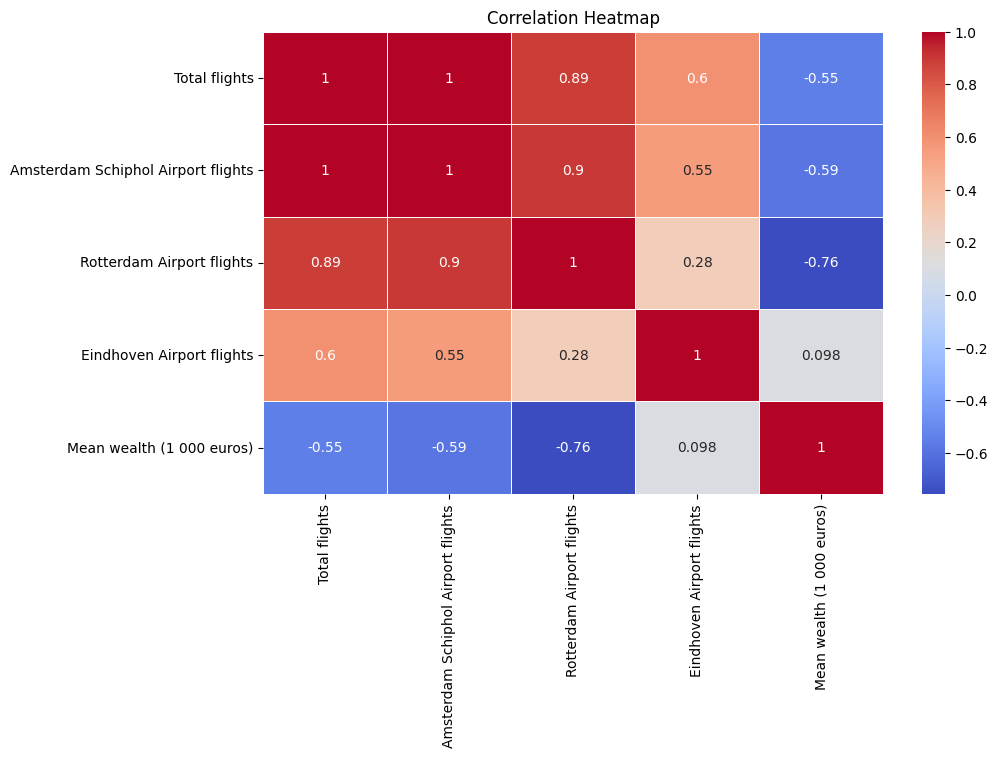

In [36]:
#Visualisation of the correlation between the wealth and the number of flights from the 3 main airports and the total flights
columns = ['Total flights', 'Amsterdam Schiphol Airport flights', 'Rotterdam Airport flights', 'Eindhoven Airport flights', 'Mean wealth (1 000 euros)' ]
# Combine the 'new' DataFrame and 'wealth' DataFrame based on the same index (Year)
combined_data = pd.concat([flight, wealth], axis=1)

# Calculate the correlation matrix for the selected columns
correlation_data = combined_data[columns]

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The results are a bit strange because the correlation between mean wealth and total flights of Amsterdam and Rotterdam are negative. But a negative correlation means that if the one variabele decreases the other variable increases. So, in this case if the wealth increases the number of flights decreases. Despite this, there is a moderate correlation between total number of flights and mean wealth and between number of flights from Amsterdam and mean wealth. The correlation between Rotterdam and wealth is very strong. Because of this the relation between Rotterdam and wealth will further be explored. 

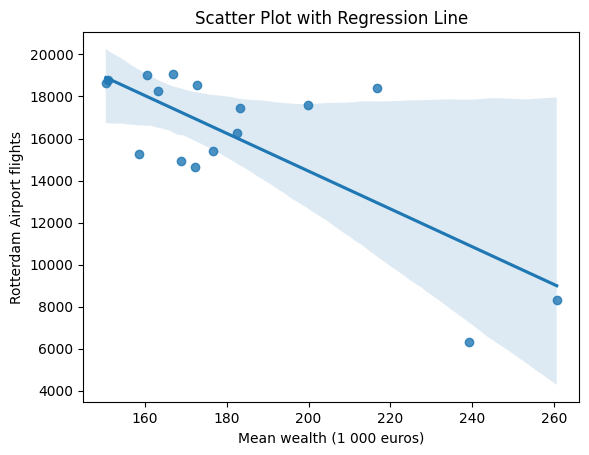

In [45]:
#Data plot in a regression model
sns.regplot(data=correlation_data, x="Mean wealth (1 000 euros)", y="Rotterdam Airport flights", robust = True)

plt.gca().set_title("Scatter Plot with Regression Line")
plt.show()

In the regression plot above it is visible that the correlation between the flights from Rotterdam Airport and the wealth is a negative correlation. So, when the wealth increase (the people have more money to spend) the number of flights to Rotterdam airport decreases. By separately looking at the relationship between the number of flight movements from Rotterdam over time and the relationship between wealth and wealth over time, an underlying reason can be found for the behavior of this relationship.

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-pac

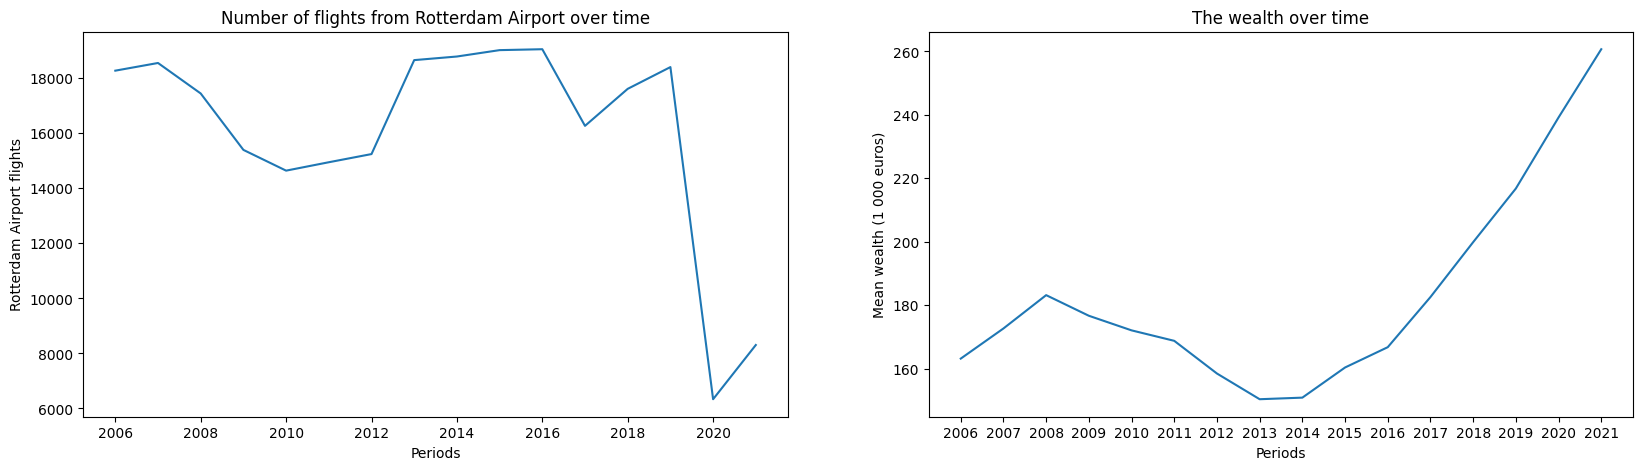

In [41]:
#Plot 2 lineplots next to each other
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
sns.lineplot(x='Periods', y='Rotterdam Airport flights', data=flight, ax=ax[0])
sns.lineplot(x='Periods', y='Mean wealth (1 000 euros)', data=wealth, ax=ax[1])

ax[0].set_title('Number of flights from Rotterdam Airport over time')
ax[1].set_title('The wealth over time')
plt.show()

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/fyodor/anaconda3/envs/TIL6022/lib/python3.11/site-pac

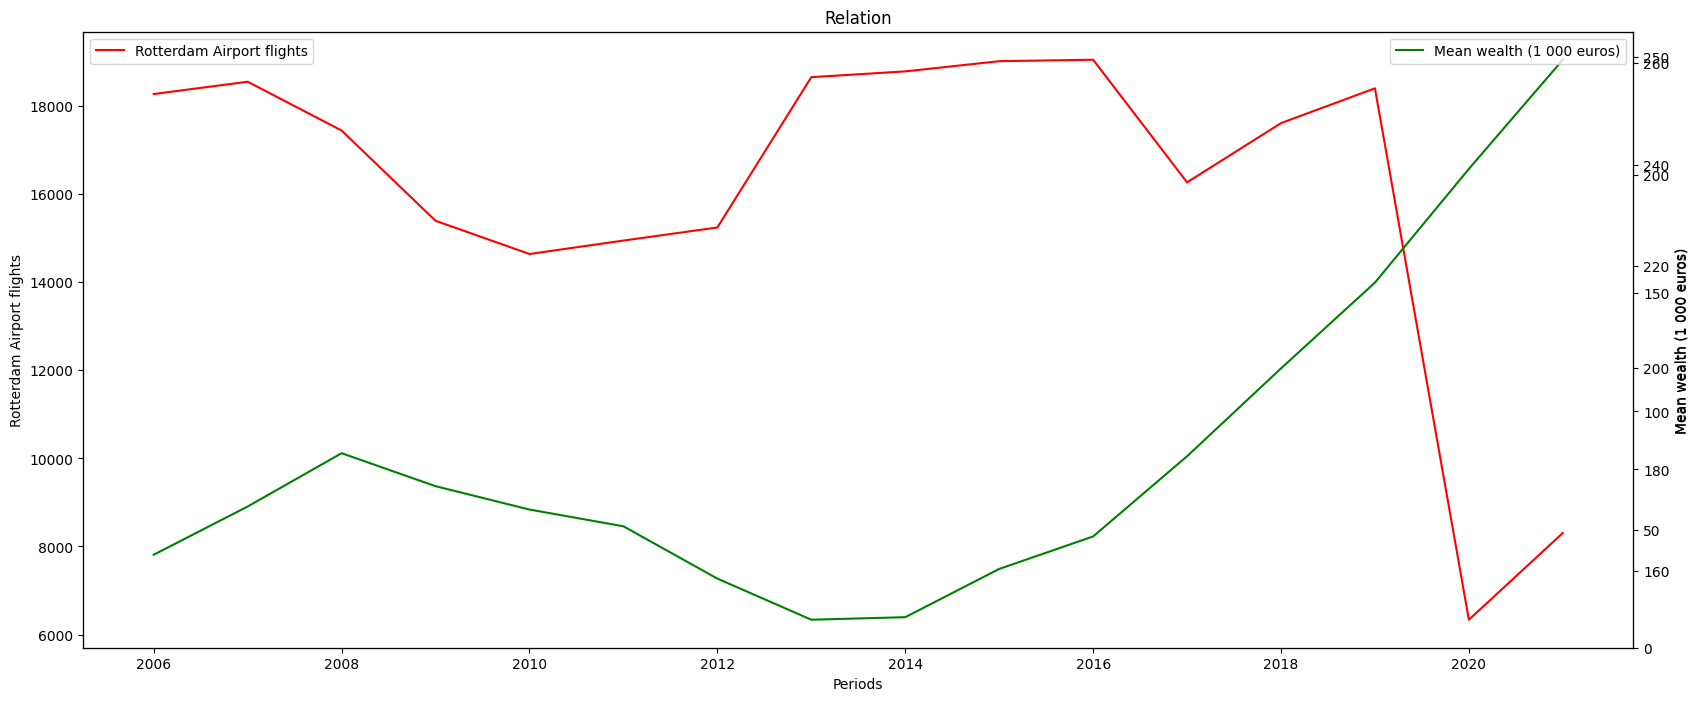

In [56]:
# Assuming flight and wealth are your DataFrames
y1_color = "red"
y2_color = "green"

x1 = flight['Periods']
y1 = flight['Rotterdam Airport flights']
y2 = wealth['Mean wealth (1 000 euros)']
y2_limit = y2.max() 

fig, ax1 = plt.subplots(figsize=(20, 8))
ax1.set_title("Relation")
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Set y-axis limits for the second y-axis
ax2.set(ylim=(0, y2_limit))

# Plot the first dataset on the first y-axis
g1 = sns.lineplot(data=flight, x=x1, y=y1, ax=ax1, color=y1_color, label='Rotterdam Airport flights')

# Plot the second dataset on the second y-axis
g3 = sns.lineplot(data=wealth, x=x1, y=y2, ax=ax3, color=y2_color, label='Mean wealth (1 000 euros)')

# Set labels for y-axes
ax1.set_ylabel('Rotterdam Airport flights')
ax2.set_ylabel('Mean wealth (1 000 euros)')

# Show legend
ax1.legend(loc='upper left')
ax3.legend(loc='upper right')

plt.show()

The above graphs represent the relationships between the number of flights from Rotterdam and the wealth indicators seperately over time. In the first graph, they are presented side by side, but then together in a single graph. This presentation makes it easier to compare the line plots, revealing that a decline in wealth is observable earlier in the number of flights than in the wealth trend itself. For instance, it is evident that wealth decreases from around 2008 to 2013, but a decrease in the number of flights begins as early as 2007. The same pattern holds for the COVID-19 crisis in 2019; there was a reduction in flight activity, but this crisis is not yet apparent in the wealth trend.

A couple of side notes: 
* I doubt the correlation matrix, because I thaught if the wealth decreases the number of flights also needs to decreases
* The last graph has a weirs right hand-side, but know idea how to fix that
* Maybe switch to another economic factor, because I can't explain the behaviour and it only goes back to 2006 so can't tell us anything about the drop in 2003.

Further research will be done on the trends on number of fligths between Schiphol and the, so-called, budget airports, as well as the comparison to GDP.